In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pylab 
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import math

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from spacy.parts_of_speech import ADV
from spacy.en import English
parser = English()

In [3]:
#Constants
TAGS = ['ADJ', 'ADV', 'ADP', 'CONJ', 'DET', 'NOUN', 'NUM', 'PUNCT','VERB']

# Cleaning Data

In [4]:
movies = pd.read_csv("movies.csv")

In [5]:
def title_pos(title):
    p_title = parser(title.decode('utf-8'))
    tokencount = {}
    for token in p_title:
        tokencount[token.pos_] = tokencount.get(token.pos_,0) + 1
    return tokencount

In [6]:
movies['POS'] = map(lambda x: title_pos(x),movies['Title'])

In [7]:
movies['Total Gross'] = map(lambda x: x.translate(None, string.punctuation),movies['Total Gross'])
movies['Total Gross'] = movies['Total Gross'].replace('n/a',np.nan)
movies['Total Gross'] = movies['Total Gross'].replace('na', np.nan)
movies = movies[movies['Total Gross'].notnull()]

In [8]:
movies['Total Gross'] = map(lambda x: int(x),movies['Total Gross'])

In [9]:
def column_to_int(df,col):
    df[col] = map(lambda x: x.translate(None, string.punctuation),df[col])
    df[col] = df[col].replace('n/a',np.nan)
    df[col] = df[col].replace('na', np.nan)
    df = df[df[col].notnull()]
    df[col] = map(lambda x: int(x),df[col])
    return df

In [10]:
for tag in TAGS:
    movies[tag] = map(lambda x: x.get(tag,0),movies['POS'])

In [11]:
movies = column_to_int(movies,'TTheaters')

In [12]:
movies['Total Gross Log'] = map(lambda x:math.log(x,10), movies['Total Gross'])

In [13]:
movies.sort('ADP',ascending=False)

,Title,Studio,Total Gross,TTheaters,Opening,OTheaters,Open,POS,ADJ,ADV,ADP,CONJ,DET,NOUN,NUM,PUNCT,VERB,Total Gross Log
1727,Borat: Cultural Learnings of America for Make ...,Fox,128505958,2611,"26,455,463",837,11/3/2006,"{u'ADJ': 1, u'PUNCT': 1, u'NOUN': 8, u'ADP': 3}",1,0,3,0,0,8,0,1,0,8.108923
14096,Tim Burton's The Nightmare Before Christmas in...,BV,1109188,284,"398,411",284,10/24/2008,"{u'NOUN': 6, u'ADP': 3, u'DET': 1, u'PUNCT': 3...",0,0,3,0,1,6,1,3,0,6.045005
14098,Tim Burton's The Nightmare Before Christmas in...,BV,14486897,564,"5,330,101",564,10/19/2007,"{u'NOUN': 8, u'ADP': 3, u'DET': 1, u'PUNCT': 3...",0,0,3,0,1,8,1,3,0,7.160975
6807,In No Great Hurry: 13 Lessons in Life with Sau...,mTuck,12133,4,"6,100",1,1/3/2014,"{u'NOUN': 6, u'NUM': 1, u'DET': 1, u'ADP': 3, ...",0,0,3,0,1,6,1,1,0,4.083968
8436,The Lord of the Rings: The Fellowship of the R...,WB,768580,522,n/a,n/a,6/14/2011,"{u'NOUN': 5, u'NUM': 1, u'DET': 4, u'ADP': 3, ...",0,0,3,0,4,5,1,4,0,5.885689
6819,In the Face of Evil: Reagan's War in Word and ...,NFF,110577,15,"46,975",6,10/1/2004,"{u'NOUN': 6, u'ADP': 3, u'DET': 1, u'PUNCT': 1...",0,0,3,1,1,6,0,1,0,5.043665
186,Ain't In It For My Health: A Film About Levon ...,KL,113966,10,"7,937",1,4/19/2013,"{u'ADV': 1, u'NOUN': 5, u'ADP': 3, u'DET': 1, ...",1,1,3,0,1,5,0,1,1,5.056775
8438,The Lord of the Rings: The Return of the King ...,WB,818580,521,n/a,n/a,6/28/2011,"{u'NOUN': 5, u'NUM': 1, u'DET': 4, u'ADP': 3, ...",0,0,3,0,4,5,1,4,0,5.913061
14097,Tim Burton's The Nightmare Before Christmas in...,BV,406085,105,"143,289",105,10/23/2009,"{u'NOUN': 6, u'ADP': 3, u'DET': 1, u'PUNCT': 3...",0,0,3,0,1,6,1,3,0,5.608617
763,At Play in the Fields of the Lord,Uni.,1345903,25,"118,162",11,12/6/1991,"{u'DET': 2, u'NOUN': 3, u'ADP': 3}",0,0,3,0,2,3,0,0,0,6.129014


# Regression

In [14]:
def fit(x,y):
    rgr = LinearRegression()
    rgr.fit(x.values, y)
    return rgr

def score(rgr, X_test, y_test):
    return np.mean((rgr.predict(X_test) - y_test)**2)

def plot_stuff(model,feature,indx):
    b = model.intercept_
    m = model.coef_
    x = range(10)
    plt.scatter(X_test[feature],model.predict(X_test),alpha=.05)
    plt.scatter(X_test[feature],y_test,alpha=.01, color='red')
    plt.plot(x,map(lambda a: m[indx]*a+b,x))
    plt.xlabel(feature)
    
def plot_movies(features,model,X_test,y_test):
    '''
    features - list of features
    model - regression object
    X_test - x values
    Y_test - y_values
    '''
    fig, axes = plt.subplots(len(features),1,figsize=(7,20))
    plt.subplots_adjust(hspace=.5)
    for feature in features:
        b = model.intercept_
        m = model.coef_
        #x = range(int(max(X_test[feature])))
        x=np.linspace(min(X_test[feature]),max(X_test[feature]),40)
        axes[features.index(feature)].scatter(X_test[feature],model.predict(X_test),alpha=.05,label='Predicted')
        axes[features.index(feature)].scatter(X_test[feature],y_test,alpha=.01, color='red',label='Actual')
        axes[features.index(feature)].plot(x,map(lambda a: m[features.index(feature)]*a+b,x))
        axes[features.index(feature)].set_xlabel("{f} Beta: {b}".format(f=feature,b=m[features.index(feature)]))
        axes[features.index(feature)].set_ylabel('Log of Total Gross')
        axes[features.index(feature)].set_title(feature + ' vs. Log of Total Gross')
        axes[features.index(feature)].legend(loc='best')

In [15]:
def fit_ridge(x,y,alph):
    ridge = Ridge(alpha = alph)
    ridge.fit(x.values,y)
    return ridge

def test_ridge(x,y,alph,runs):
    '''
    x - independent data set
    y - dependent data 1-d
    alph - ridge regression lambda
    runs - number of attempts
    '''
    scores = []
    for _ in range(runs):
        #Split Data
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
        
        #Normalize Data
        avg = X_train.mean()
        big = X_train.max()
        small = X_train.min()
        X_train = (X_train - avg)/(big - small)
        X_test = (X_test - avg)/(big - small)
        
        rgr = fit_ridge(X_train,y_train,1)
        scores.append((score(rgr,X_train,y_train),score(rgr,X_test,y_test),score(rgr,X_test,y_test)-score(rgr,X_train,y_train)))
    return [np.mean(x) for x in zip(*scores)]

In [16]:
y = movies['Total Gross Log']
x = movies[TAGS]

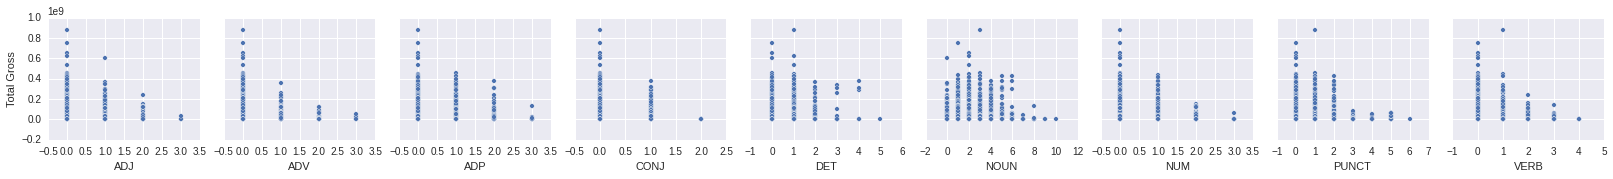

In [17]:
sns.pairplot(movies, x_vars = TAGS,y_vars=['Total Gross'])

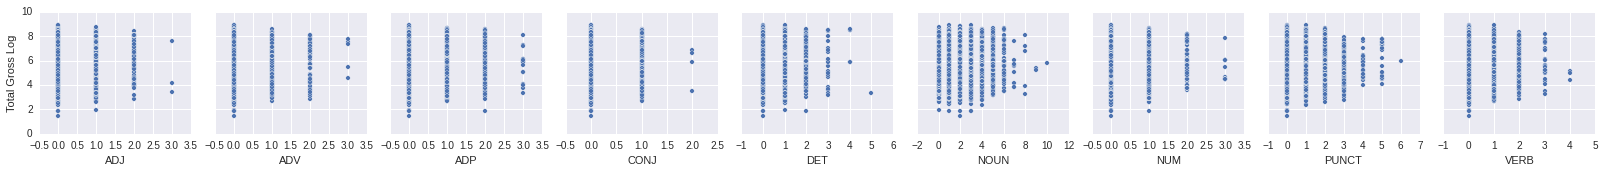

In [18]:
sns.pairplot(movies, x_vars = TAGS,y_vars=['Total Gross Log'])

# BINNING THE NUMBER OF THEATERS THE MOVIE IS RELEASED IN
# I USED THIS ONE

In [19]:
from sklearn.preprocessing import PolynomialFeatures, normalize

In [20]:
#Create Dummies
movies['Wide Release']=0
movies['Wide Release'][movies['TTheaters']>1000]=1
movies['Mid Release']=0
movies['Mid Release'][(movies['TTheaters']<=1000) & (movies['TTheaters']>20)] = 1
movies['Low Release']=0
movies['Low Release'][movies['TTheaters']<=20] = 1

In [21]:
#Checking my bins
garb = movies
garb['GRAPH'] = garb['Wide Release']*3
garb['GRAPH'] = garb['GRAPH']+ garb['Mid Release'] *2
garb['GRAPH'] = garb['GRAPH']+ garb['Low Release']

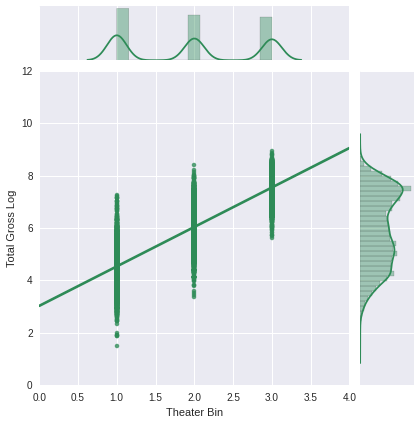

In [22]:
ax = sns.jointplot(garb['GRAPH'], garb['Total Gross Log'],stat_func=None, kind='reg', color="seagreen")
ax.set_axis_labels('Theater Bin','Total Gross Log')

In [23]:
#Set up X and Y, avoid Dummy Trap
y = movies['Total Gross Log']
NEW_TAGS = TAGS+['Wide Release','Mid Release']
x_pre = movies[NEW_TAGS]
poly = PolynomialFeatures(degree=2,interaction_only=True)
x = normalize(poly.fit_transform(x_pre).astype(np.float))

In [24]:
def fit_poly(x,y,alph):
    ridge = Ridge(alpha = alph)
    ridge.fit(x,y)
    return ridge

In [25]:
def test_poly(x,y,alph,runs):
    '''
    x - independent data set
    y - dependent data 1-d
    alph - ridge regression lambda
    runs - number of attempts
    '''
    scores = []
    for _ in range(runs):
        #Split Data
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
        
#         #Normalize Data
#         avg = X_train.mean()
#         big = X_train.max()
#         small = X_train.min()
#         X_train = (X_train - avg)/(big - small)
#         X_test = (X_test - avg)/(big - small)
        
        rgr = fit_poly(X_train,y_train,1)
        scores.append(score(rgr,X_test,y_test))
    return np.mean(scores)

In [26]:
a= [test_poly(x,y,runs,20) for runs in np.linspace(0,50,50)]

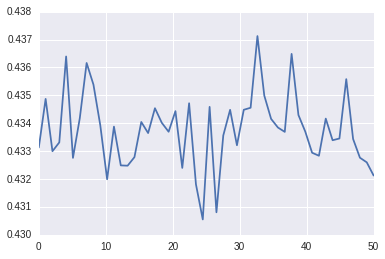

In [27]:
plt.plot(np.linspace(0,50,50),a)

In [28]:
#Minimum Lambda Near 10
rgr = fit_poly(x,y,10)
rgr.score(x,y)

0.77652757307680587

In [29]:
residuals = rgr.predict(x)-y

((array([-3.91957884, -3.70033666, -3.58023444, ...,  3.58023444,
          3.70033666,  3.91957884]),
  array([-2.73647669, -2.54724565, -2.46232472, ...,  2.76212665,
          2.94134367,  3.24269233])),
 (0.66173841880843209, 3.439498434820507e-14, 0.99905917769308117))

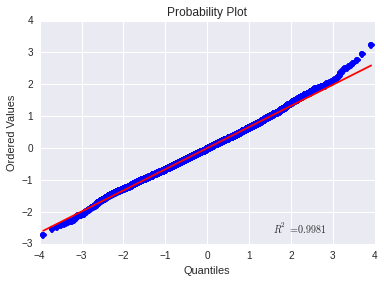

In [30]:
stats.probplot(residuals, dist="norm", plot=pylab)

In [31]:
from sklearn import feature_selection

In [32]:
y = y.astype(np.float)

In [33]:
ga,pvals = feature_selection.f_regression(x,y)

In [34]:
import itertools

In [35]:
all_tags = list(itertools.product(NEW_TAGS,NEW_TAGS))
all_tags = [(a,b) for (a,b) in all_tags if a!=b]
all_tags = ['1']+NEW_TAGS+list(itertools.combinations(NEW_TAGS,2))

In [36]:
print len(rgr.coef_),len(all_tags)

67 67


# Massaging the Betas

In [37]:
betas = zip(rgr.coef_,all_tags)

In [38]:
#F-Test
[(i,j) for i,j in zip(pvals,betas) if i < .05]

[(3.6005473713736806e-148, (-0.97502837479595594, '1')),
 (0.00010848226764624948, (-0.66273036345335201, 'ADJ')),
 (3.1089984526875245e-27, (-0.63531099142837599, 'ADP')),
 (0.042655043850018066, (-0.089653180977478139, 'CONJ')),
 (0.046128562653204593, (-0.8351083683439896, 'DET')),
 (1.3700041935248095e-160, (-1.204202116068281, 'NOUN')),
 (2.6142743217680544e-06, (-0.87580534841297075, 'NUM')),
 (3.9282921572918907e-11, (-1.0960094350948133, 'PUNCT')),
 (1.1733163226612268e-12, (-0.82935744373236087, 'VERB')),
 (0.0, (2.2206511466261163, 'Wide Release')),
 (3.6305635508262494e-18, (1.1854328711736604, 'Mid Release')),
 (3.0183752845524985e-08, (-0.22357671375423904, ('ADJ', 'ADP'))),
 (0.0049873578408754825, (-0.38409566285148811, ('ADJ', 'DET'))),
 (4.4148209469122249e-06, (-0.039627043942483911, ('ADJ', 'NOUN'))),
 (0.027929998303666444, (0.36003058062363991, ('ADJ', 'NUM'))),
 (0.02391582207025501, (-0.20914950687191614, ('ADJ', 'PUNCT'))),
 (0.0005514552225880725, (-0.068301157

In [39]:
def beta_filter(bs,label):
    filtered = []
    for b in bs:
        if (b[1] == label):
            filtered.append(b)
        else:
            try:
                if (b[1][0] == label) or (b[1][1] == label):
                    filtered.append(b)
            except:
                pass
    return filtered

def plot_bees(b,title):
#     b = sorted(b)
    b_x, tags = zip(*b)
    b_x,b_y =zip(*enumerate(b_x))
    ax = sns.barplot(b_x,b_y,order=b_x,palette='muted')
    ax.set_title(title)
    ax.set_xticks([])
    
def merge_label(BHH):
    AHH = []
    for j in BHH:
        if type(j[1]) == tuple:
            AHH.append((j[0],j[1][0]))
        else:
            AHH.append(j)
    return AHH

# Graphs and Tables showing certain Betas

In [40]:
g_x = all_tags[:11]+[x[0]+x[1] for x in all_tags[11:]]

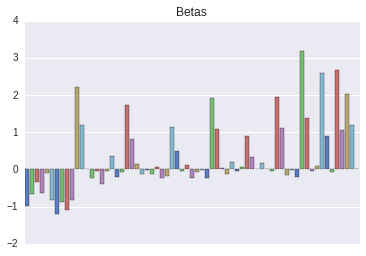

In [41]:
# g_x, g_y = zip(*enumerate(rgr.coef_))
g = sns.barplot(x=g_x,y=rgr.coef_,order=g_x,palette='muted')
g.set_xticks([])
g.set_title('Betas')


In [42]:
gfx_w = merge_label(beta_filter(betas,'Wide Release'))[:-1]

In [43]:
gfx_m = merge_label(beta_filter(betas,'Mid Release'))[:-1]

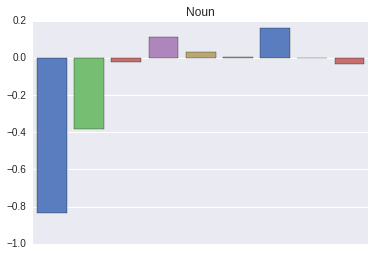

In [44]:
plot_bees(merge_label(beta_filter(betas,'DET'))[:-2],'Noun')

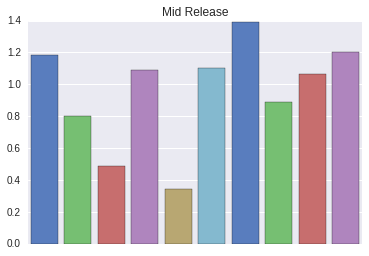

In [45]:
plot_bees(gfx_m,'Mid Release')

In [46]:
w,_ = zip(*beta_filter(betas,'Wide Release')[1:10])

In [47]:
m,_ = zip(*beta_filter(betas,'Mid Release')[1:10])

In [48]:
s,_ = zip(*betas[1:10])

In [49]:
gfx_tag =[j for i,j in betas[1:10]]

In [50]:
gfx_tag

['ADJ', 'ADV', 'ADP', 'CONJ', 'DET', 'NOUN', 'NUM', 'PUNCT', 'VERB']

In [51]:
ws = [i+j for i,j in zip(w,s)]

In [52]:
ms = [i+j for i,j in zip(m,s)]

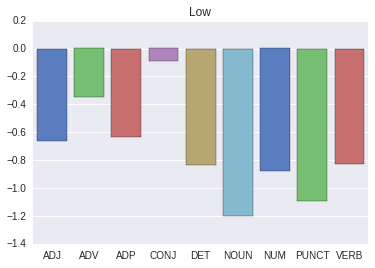

In [53]:
gfx = sns.barplot(gfx_tag,s,order=gfx_tag,palette='muted')
gfx.set_title('Low')

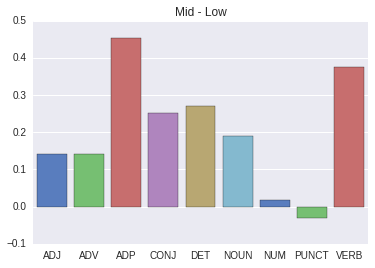

In [54]:
gfx = sns.barplot(gfx_tag,ms,order=gfx_tag,palette='muted')
gfx.set_title('Mid - Low')

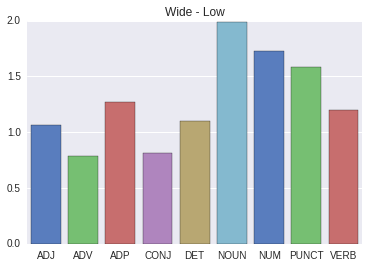

In [55]:
gfx = sns.barplot(gfx_tag,ws,order=gfx_tag,palette='muted')
gfx.set_title('Wide - Low')

In [56]:
best_b = [(i,j) for i,j in betas if (i > .7) or (i <-1) ]

In [57]:
sorted(betas[11:], key = lambda x: x[1][1])

[(-0.22357671375423904, ('ADJ', 'ADP')),
 (0.14096035520831429, ('ADV', 'ADP')),
 (0.0062269450990563371, ('ADJ', 'ADV')),
 (-0.052400615955241231, ('ADJ', 'CONJ')),
 (-0.11424621924786967, ('ADV', 'CONJ')),
 (-0.047327137208784287, ('ADP', 'CONJ')),
 (-0.38409566285148811, ('ADJ', 'DET')),
 (-0.020352827552123722, ('ADV', 'DET')),
 (0.11432955788818859, ('ADP', 'DET')),
 (0.028700844963830151, ('CONJ', 'DET')),
 (0.8042174538443051, ('ADJ', 'Mid Release')),
 (0.48941650516120772, ('ADV', 'Mid Release')),
 (1.0887530454243999, ('ADP', 'Mid Release')),
 (0.34109443462723693, ('CONJ', 'Mid Release')),
 (1.1048814995990313, ('DET', 'Mid Release')),
 (1.3936911948762667, ('NOUN', 'Mid Release')),
 (0.89255819308666839, ('NUM', 'Mid Release')),
 (1.0653278461368221, ('PUNCT', 'Mid Release')),
 (1.2035838170933184, ('VERB', 'Mid Release')),
 (0.0, ('Wide Release', 'Mid Release')),
 (-0.039627043942483911, ('ADJ', 'NOUN')),
 (-0.11770526373474764, ('ADV', 'NOUN')),
 (-0.23032432378319695, ('A

In [58]:
best_b

[(-1.204202116068281, 'NOUN'),
 (-1.0960094350948133, 'PUNCT'),
 (2.2206511466261163, 'Wide Release'),
 (1.1854328711736604, 'Mid Release'),
 (1.7251905813557202, ('ADJ', 'Wide Release')),
 (0.8042174538443051, ('ADJ', 'Mid Release')),
 (1.1310441299673593, ('ADV', 'Wide Release')),
 (1.9091736065471832, ('ADP', 'Wide Release')),
 (1.0887530454243999, ('ADP', 'Mid Release')),
 (0.90262110466404555, ('CONJ', 'Wide Release')),
 (1.9337023800078144, ('DET', 'Wide Release')),
 (1.1048814995990313, ('DET', 'Mid Release')),
 (3.1911098138357521, ('NOUN', 'Wide Release')),
 (1.3936911948762667, ('NOUN', 'Mid Release')),
 (2.6042406883627578, ('NUM', 'Wide Release')),
 (0.89255819308666839, ('NUM', 'Mid Release')),
 (2.6836963555163051, ('PUNCT', 'Wide Release')),
 (1.0653278461368221, ('PUNCT', 'Mid Release')),
 (2.0298968316814627, ('VERB', 'Wide Release')),
 (1.2035838170933184, ('VERB', 'Mid Release'))]